In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = os.path.join('data/train/')
validation_dir = os.path.join('data/test/')

In [4]:
train_healthy_dir = os.path.join(train_dir, 'healthy')  # directory with our training healthy pictures
train_infected_dir = os.path.join(train_dir, 'infected')  # directory with our training infected pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')  # directory with our validation healthy pictures
validation_infected_dir = os.path.join(validation_dir, 'infected')  # directory with our validation infected pictures

In [5]:
num_healthy_tr = len(os.listdir(train_healthy_dir))
num_infected_tr = len(os.listdir(train_infected_dir))

num_healthy_val = len(os.listdir(validation_healthy_dir))
num_infected_val = len(os.listdir(validation_infected_dir))

total_train = num_healthy_tr + num_infected_tr
total_val = num_healthy_val + num_infected_val

In [6]:
print('total training healthy images:', num_healthy_tr)
print('total training infected images:', num_infected_tr)

print('total validation healthy images:', num_healthy_val)
print('total validation infected images:', num_infected_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training healthy images: 206
total training infected images: 207
total validation healthy images: 78
total validation infected images: 91
--
Total training images: 413
Total validation images: 169


In [7]:
batch_size = 16
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory('data/train/',batch_size=batch_size,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 413 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory('data/test/',batch_size=batch_size,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 167 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

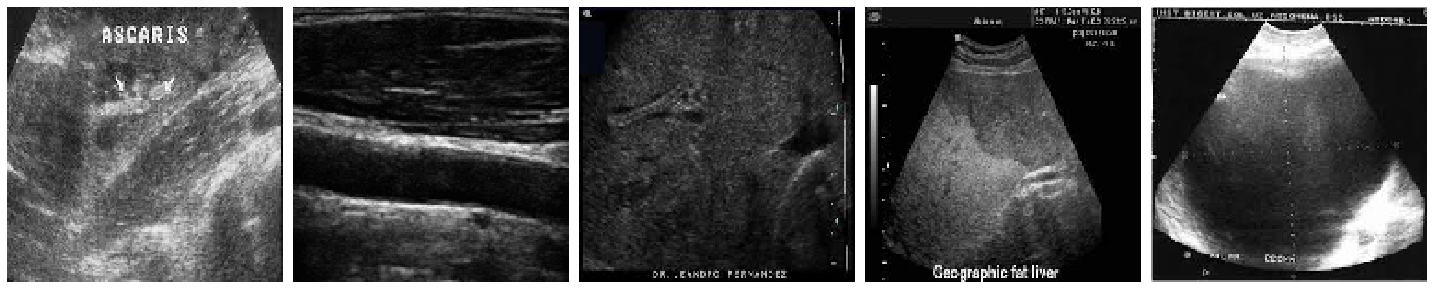

In [13]:
plotImages(sample_training_images[:5])

In [14]:
model = Sequential([
    Conv2D(8, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
    Flatten(),
    Dense(32, activation='softmax'),
    Dense(1)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [17]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(train_data_gen)

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
25/25 [==============================] - 12s 462ms/step - loss: 0.6859 - accuracy: 0.5038 - val_loss: 0.6691 - val_accuracy: 0.4625
Epoch 2/20
25/25 [==============================] - 11s 434ms/step - loss: 0.6549 - accuracy: 0.4887 - val_loss: 0.6542 - val_accuracy: 0.4625
Epoch 3/20
25/25 [==============================] - 10s 413ms/step - loss: 0.6322 - accuracy: 0.4836 - val_loss: 0.6224 - val_accuracy: 0.4625
Epoch 4/20
25/25 [==============================] - 10s 412ms/step - loss: 0.6098 - accuracy: 0.5189 - val_loss: 0.6152 - val_accuracy: 0.4625
Epoch 5/20
25/25 [==============================] - 10s 411ms/step - loss: 0.5777 - accuracy: 0.4786 - val_loss: 0.6014 - val_accuracy: 0.4625
Epoch 6/20
25/25 [==============================] - 10s 419ms/step - loss: 0.5849 - accuracy: 0.5264 - val_loss: 0.5899 - val_accuracy: 0.4625
Epoch 7/20
25/25 [==============================] - 11s 422ms/step - loss: 0.5519 - accuracy: 0.4850 - val_loss: 0.5786 - val_accuracy: 0.4625

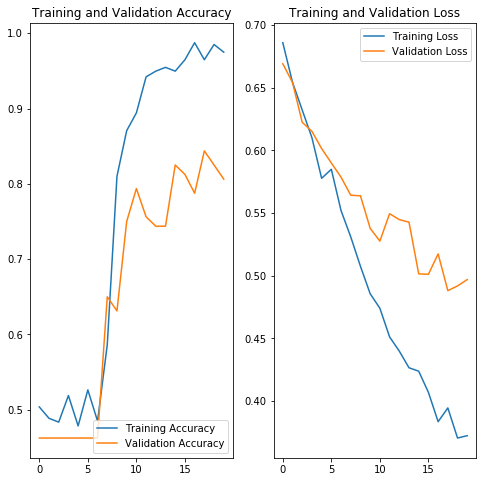

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()